In [143]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import sympy as sym
import numpy as np
import pandas as pd
import control as ct
from scipy import signal
from matplotlib import pyplot as plt

In [144]:
s,zeta,omega=sym.symbols('s,zeta,omega')
G=omega**2/(s**2+2*zeta*omega*s+omega**2)
G

omega**2/(omega**2 + 2*omega*s*zeta + s**2)

In [145]:
G_subs=G.subs({zeta:1,omega:10})
G_subs
type(G_subs)

100/(s**2 + 20*s + 100)

sympy.core.mul.Mul

In [146]:
G_subs.as_poly()

Poly(100*(1/(s**2 + 20*s + 100)), 1/(s**2 + 20*s + 100), domain='ZZ')

In [147]:
G_subs_numerator = sym.ratsimp(G_subs).as_numer_denom()[0]
G_subs_denominator = sym.ratsimp(G_subs).as_numer_denom()[1]

print("分子:", G_subs_numerator)
print("分母:", G_subs_denominator)
num=sym.Poly(G_subs_numerator, s).all_coeffs()
num
den=sym.Poly(G_subs_denominator, s).all_coeffs()
den
type(num)
type(den)
# num

分子: 100
分母: s**2 + 20*s + 100


[100]

[1, 20, 100]

list

list

In [148]:
a=np.asarray(num)
b=np.asarray(den)
a=a.astype(np.float64)
b=b.astype(np.float64)

ct.tf(a,b)

TransferFunction(array([100.]), array([  1.,  20., 100.]))

AttributeError: Line2D.set() got an unexpected keyword argument 'legends'

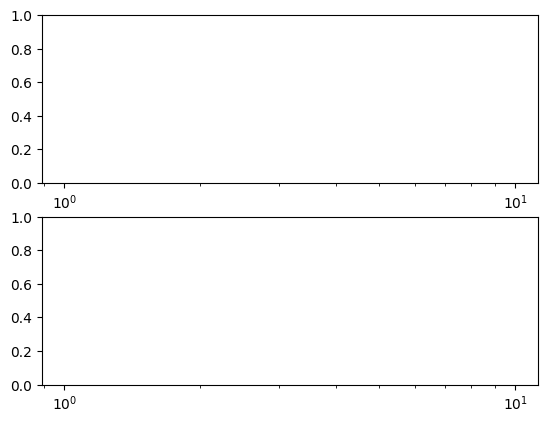

In [149]:
import control as ct
import matplotlib.pyplot as plt
import math
import numpy as np
psiList = [0.05,0.2,0.5,0.707,1.0]
sysTfList=[]
for psi in psiList:
    sysTfList.append(ct.tf([1],[1,2*psi,1]))

mag,phase,omega=ct.bode(sysTfList,omega=np.logspace(start=-1,stop=1,num=200),dB=True,deg=False,
                          legends=['0.05','0.2','0.5','0.707','1.0'])

plt.show()



## Plot Zero Pole

In [150]:

# from sympy.physics.control.control_plots import pole_zero_plot
plt.plot(z.real,z.imag,'o',color='black',label='zero')
plt.plot(p.real,p.imag,'x',color='red',label='poles')
plt.axhline(0)
plt.axvline(0)
plt.grid()
plt.legend()
# sym.pole_zero_plot

NameError: name 'z' is not defined

## Step Response

In [ ]:
G
t, y = signal.step(G)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for G')
plt.grid()

NameError: name 'G' is not defined

## Bode Plot

In [ ]:
w, mag, phase = signal.bode(G)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

TypeError: scipy.signal._ltisys.lti() argument after * must be an iterable, not Mul

In [153]:
h_angle=0
h_index=(h_angle+32768)/64
h_index
sin_mask = 0x200
SIN_MASK = 0x0300
U0_90    = 0x0200
U90_180  = 0x0300
U180_270 = 0x0000
U270_360 = 0x0100
h_index&SIN_MASK

512.0

TypeError: unsupported operand type(s) for &: 'float' and 'int'